# State Space Matrix for a buck converter
Define the State Space using the matrix (A,B,C,D) with symbols.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#from sympy.interactive.printing import init_printing
#init_printing(use_unicode=False)

from sympy import symbols
from sympy.matrices import Matrix

#define symbolic variable
#A, B, C, D                      = symbols("A, B, C, D")
A1, B1, C1, D1                  = symbols("A1, B1, C1, D1")
A2, B2, C2, D2                  = symbols("A2, B2, C2, D2")
L, C, R                         = symbols("L, C, R")
iL, Vo, Vg, d, Vc               = symbols("iL, Vo, Vg, d, Vc")


x = Matrix([iL, Vc])
u = Matrix([Vg])

Define ON state of the system using the matrix function and symbols

In [8]:
#define State-space Model
# ON STATE
A1 = Matrix([[0, -1/L] ,
            [1/C, -1/(R*C)]])

B1 = Matrix([1/L, 0])

C1 = Matrix([[0, 1]])
D1 = Matrix([0])

display(A1)
display(B1)
display(C1)
display(D1)

Matrix([
[  0,     -1/L],
[1/C, -1/(C*R)]])

Matrix([
[1/L],
[  0]])

Matrix([[0, 1]])

Matrix([[0]])

Define OFF state of the system using the matrix function and symbols

In [9]:
# OFF STATE
A2 = Matrix([[0, -1/L] , 
          [1/C, -1/(R*C)]])

B2 = Matrix([0, 0])

C2 = Matrix([[0, 1]])
D2 = Matrix([0])

display(A2)
display(B2)
display(C2)
display(D2)

Matrix([
[  0,     -1/L],
[1/C, -1/(C*R)]])

Matrix([
[0],
[0]])

Matrix([[0, 1]])

Matrix([[0]])

# Combination of the two states define previously.  
d = duty_cycle >> Ton time  
(1-d) = (1-duty_cycle) >> Toff time 

In [10]:
# ON STATE + OFF STATE
# dx = A*x + B*u
#  y = C*x + D*u
A_sym = (A1*d + A2*(1-d))#*x
B_sym = (B1*d + B2*(1-d))*u
C_sym = (C1*d + C2*(1-d))#*x
D_sym = (D1 + D2)*u
display(A_sym)
display(B_sym)
display(C_sym)
display(D_sym)

Matrix([
[              0,         -d/L - (1 - d)/L],
[d/C + (1 - d)/C, -d/(C*R) - (1 - d)/(C*R)]])

Matrix([
[Vg*d/L],
[     0]])

Matrix([[0, 1]])

Matrix([[0]])

Substitute the symbolic variable in the matrix with defined values. 

In [11]:
# Find Transfer Function from u to y
A_exp = A_sym.subs({L: 10e-6, C: 10e6, d:0.25, R:10})
B_exp = B_sym.subs({L: 10e-6, C: 10e6, d:0.25, R:10, Vg: 1})
C_exp = C_sym
D_exp = D_sym
#p = {L: 10e-6, C: 10e6, d:0.25, R:10, Vg: 1}
#A_exp = np.matrix(A_sym.subs(p))
#B_exp = np.matrix(B_sym.subs(p))
#C_exp = np.matrix(C_sym.subs(p))
#D_exp = np.matrix(D_sym.subs(p))
#display(A_sym)
display(A_exp)
#display(B_sym)
display(B_exp)
#display(C_sym)
display(C_exp)

# Convert the SymPy matrix to a NumPy matrix
A_numpy = np.matrix(A_exp.tolist(), dtype=np.float64)
B_numpy = np.matrix(B_exp.tolist(), dtype=np.float64)
C_numpy = np.matrix(C_exp.tolist(), dtype=np.float64)
D_numpy = np.matrix(D_exp.tolist(), dtype=np.float64)

#display(numpy_A)
#display(numpy_B)
#display(numpy_C)

Matrix([
[     0, -100000.0],
[1.0e-7,   -1.0e-8]])

Matrix([
[25000.0],
[      0]])

Matrix([[0, 1]])

# Plot the time response of the system  

Text(0.5, 1.0, 'System step response')

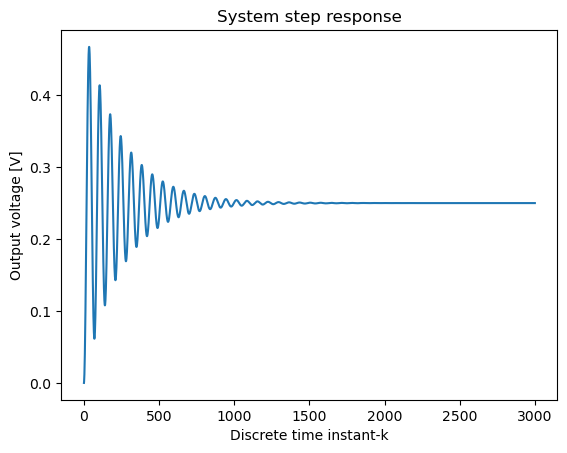

In [12]:
# define the continuous-time system matrices
A = A_numpy
B = B_numpy
C = C_numpy
D = D_numpy

#define an initial state for simulation
# x = Matrix([iL, Vc]) ===>>>   x0 = Matrix([iL=0, Vc=0])
x0 = np.matrix([[0],[0]])
#display(x0)

#define the number of time-samples used for the simulation and the sampling time for the discretization
time=3000
sampling=0.9
 
#define an input sequence for the simulation
#input_seq=np.random.rand(time,1)
input_seq=np.ones(time)
#plt.plot(input_sequence)
 
 
# the following function simulates the state-space model using the backward Euler method
# the input parameters are:
#    -- A,B,C              - continuous time system matrices 
#    -- initial_state      - the initial state of the system 
#    -- time_steps         - the total number of simulation time steps 
#    -- sampling_perios    - the sampling period for the backward Euler discretization 
# this function returns the state sequence and the output sequence
# they are stored in the vectors Xd and Yd respectively
def simulate(A,B,C,initial_state,input_sequence, time_steps,sampling_period):
    from numpy.linalg import inv
    I=np.identity(A.shape[0]) # this is an identity matrix
    Ad=inv(I-sampling_period*A)
    Bd=Ad*sampling_period*B
    Xd=np.zeros(shape=(A.shape[0],time_steps+1))
    Yd=np.zeros(shape=(C.shape[0],time_steps+1))
     
    for i in range(0,time_steps):
       if i==0:
           Xd[:,[i]]=initial_state
           Yd[:,[i]]=C*initial_state
           x=Ad*initial_state+Bd*input_sequence[i]
       else:
           Xd[:,[i]]=x
           Yd[:,[i]]=C*x
           x=Ad*x+Bd*input_sequence[i]
    Xd[:,[-1]]=x
    Yd[:,[-1]]=C*x
    return Xd, Yd
     
state,output=simulate(A,B,C,x0,input_seq, time ,sampling)    

plt.plot(output[0,:])
plt.xlabel('Discrete time instant-k')
plt.ylabel('Output voltage [V]')
plt.title('System step response')